In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# time series
time_series = pd.DataFrame(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
time_series = time_series.cumsum()

# generic dataset
ds = pd.DataFrame({'A':np.random.randn(10000), 'B':np.random.randn(10000), 'C':np.random.randn(10000), 'D':np.random.randn(10000)*3})

ds_cumsum = ds.cumsum() # cumulative sum of generic dataset
ds_cumsum['index'] = list(range(len(ds_cumsum)))
small_ds = ds.sample(10) # small sample of generic dataset

# ds with only natural numbers
A = np.random.randint(0, 100, 100)
B = np.random.randint(0, 100, 100)
C = np.random.randint(0, 100, 100)
ds_natural = pd.DataFrame({'A':A,'B':B,'C':C})
ds_natural
ds_natural_cumsum = ds_natural.cumsum()
ds_natural_small = ds_natural.sample(10)

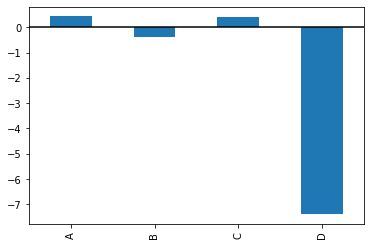

In [3]:
plt.figure()
ds.iloc[2].plot.bar()
plt.axhline(0, color='k')

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random
import torch
import torch.nn as nn
import torch.nn.functional as F 
from matplotlib.ticker import StrMethodFormatter
import glob
from tqdm import tqdm
import re

In [5]:
# seed = 29
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# os.environ["PYTHONHASHSEED"] = str(seed)

# Define data path
DATA_PATH = r'test'
prev_value_map = {}

In [6]:
# #MIMIC_NOTES_PATHS = ['/mnt/data01/mimic-3/benchmark-notes/test', '/mnt/data01/mimic-3/benchmark-notes/train']  
# MIMIC_NOTES_PATHS = ['C:\\Users\\SWAPNA\\1_DLH\\2_DLH_Statistics\\train', 'C:\\Users\\SWAPNA\\1_DLH\\2_DLH_Statistics\\test']  
# all_files = []
# for path in MIMIC_NOTES_PATHS:
#     files = glob.glob(path + "/*/*_notes_sent.csv")
#     all_files += files
# print(f"\nTotal note files: {len(all_files)}")
# print(f"\nNote files: {all_files}")
# li = []
# for filename in tqdm(all_files, desc="Load note files"):
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df["filename"] = filename
#     li.append(df)
# notes = pd.concat(li, axis=0, ignore_index=True)
# notes.describe(include="all")
# print(f"Total notes: {len(notes)}")
# print(notes["filename"])
# notes["PATIENT_ID"] = notes["filename"].apply(lambda x: int(re.findall(r'/[0-9]+/', x)[-1][1:-1]))
# # Add episode to the table
# notes["EPISODE_ID"] = notes["filename"].apply(lambda x: int(re.findall(r'episode[0-9]+_', x)[-1][7:-1]))

In [7]:
ret = re.findall(r'/[0-9]+/', 'C:\\Users\\SWAPNA\\1_DLH\\2_DLH_Statistics\\train\\7693\\episode1_notes_sent.csv')
print(ret)

[]


In [8]:
xx = "rudra guru99,education is fun"
r1 = re.findall(r"\w+", xx)[-1][1:-1]
print(r1)

u


In [9]:
ret = re.findall(r'/[0-9]+/', '/Users/SWAPNA/1_DLH/2_DLH_Statistics/train/7693/episode1_notes_sent.csv')[-1][1:-1]
print(ret)

7693


In [10]:
from __future__ import absolute_import
from __future__ import print_function

def dataframe_from_csv(path, header=0, index_col=0):
    return pd.read_csv(path, header=header, index_col=index_col)


In [11]:
def read_notes_table():
    #pats = pd.read_csv('NOTEEVENTS-2.csv', header=0, index_col=0) 
    pats = dataframe_from_csv('NOTEEVENTS.csv')
    pats = pats[['SUBJECT_ID', 'HADM_ID', 'CHARTDATE',
                 'CHARTTIME', 'CATEGORY', 'DESCRIPTION', 'ISERROR', 'TEXT']]
    pats = pats[pats['ISERROR'] != 1]
    pats.CHARTDATE = pd.to_datetime(pats.CHARTDATE)
    pats.CHARTTIME = pd.to_datetime(pats.CHARTTIME)
    pats.drop(columns=['ISERROR'],inplace=True)
    return pats

df6 = read_notes_table()
df6.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,TEXT
ROW_ID,,,,,,,
174,22532,167853.0,2151-08-04,NaT,Discharge summary,Report,Admission Date: [**2151-7-16**] Dischar...
175,13702,107527.0,2118-06-14,NaT,Discharge summary,Report,Admission Date: [**2118-6-2**] Discharg...
176,13702,167118.0,2119-05-25,NaT,Discharge summary,Report,Admission Date: [**2119-5-4**] D...
177,13702,196489.0,2124-08-18,NaT,Discharge summary,Report,Admission Date: [**2124-7-21**] ...
178,26880,135453.0,2162-03-25,NaT,Discharge summary,Report,Admission Date: [**2162-3-3**] D...


In [12]:
df6_1 = df6[['SUBJECT_ID', 'CATEGORY']]
df6_1.head()

,SUBJECT_ID,CATEGORY
ROW_ID,,
174,22532,Discharge summary
175,13702,Discharge summary
176,13702,Discharge summary
177,13702,Discharge summary
178,26880,Discharge summary


In [13]:
df6_2 = df6_1.groupby('CATEGORY')['SUBJECT_ID'].nunique()
df6_2

CATEGORY
Case Management        576
Consult                 49
Discharge summary    41127
ECG                  35366
Echo                 22316
General               2908
Nursing               7703
Nursing/other        30005
Nutrition             2823
Pharmacy                67
Physician             7623
Radiology            37351
Rehab Services        2130
Respiratory           3598
Social Work           1337
Name: SUBJECT_ID, dtype: int64

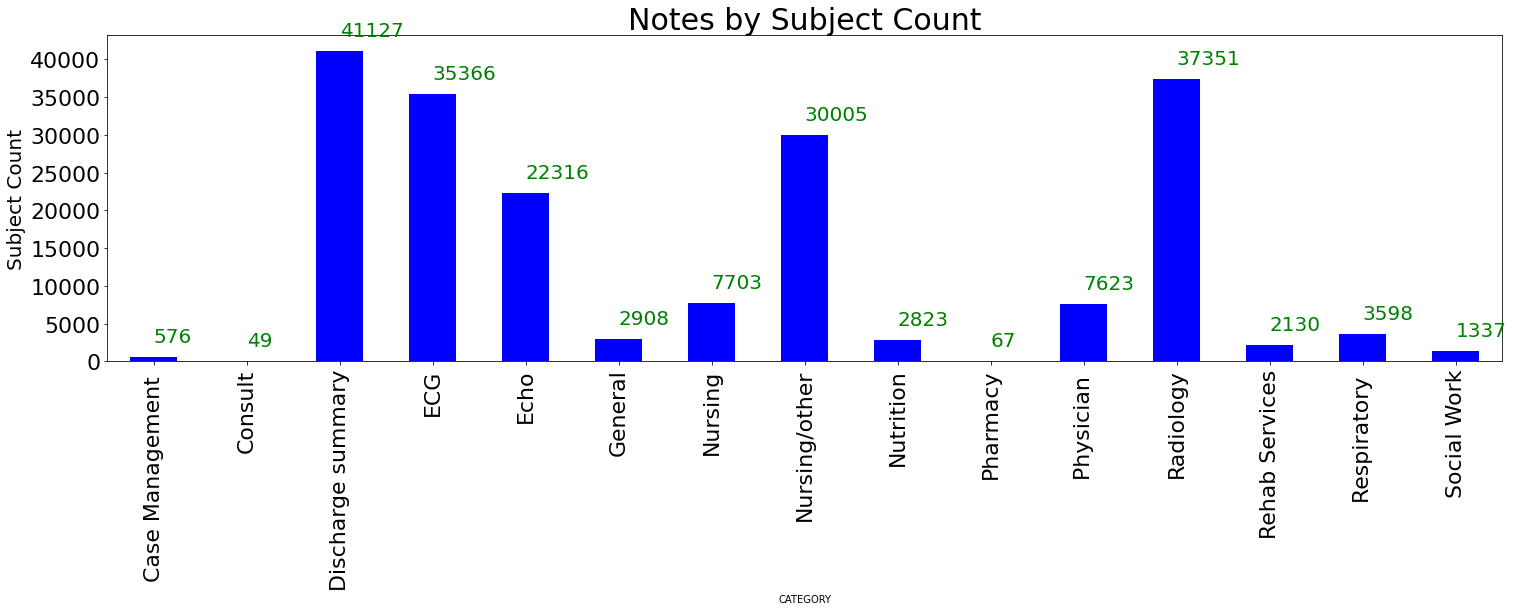

In [14]:
plt.ylabel('Subject Count', size = 20)
plt.title('Notes by Subject Count', size = 30)
ax = df6_2.plot(kind='bar', x='CATEGORY', y='val', color = "blue", fontsize='22', figsize=(25, 6))
for idx, label in enumerate(list(df6_2.index)): 
    value = df6_2[label]
    ax.annotate(df6_2[label],
                (idx, value),
                 xytext=(0, 15), 
                 textcoords='offset points',
                 size=20, 
                 color='green')
#plt.savefig('LOSCount.png')  